Credit Card Fraud Detection Project

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, they did not provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


Workflow:
    1.Credit card data
    2.Data PreProcessing
    3.Data Analysis
    4.Train Test Split
    5.Logistic Regression Model
    6.Evaluation

In [2]:
#importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.Credit card data**

In [3]:
card = pd.read_csv('creditcard.csv')

In [4]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#showing the shape of card dataframe
card.shape

(284807, 31)

In [6]:
#showing all the columns present in our card dataframe
card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#checking the number of missing values in our card dataframe
card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#It clearly shows target label is unbalanced
# 0 -> Normal Transaction
# 1 -> Fraudulent Transaction
card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

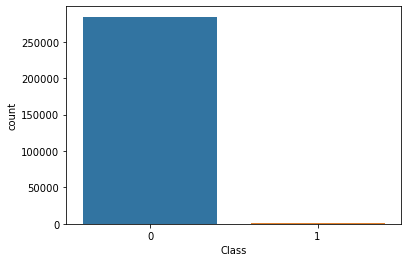

In [10]:
 sns.countplot(x=card['Class'])

<AxesSubplot:>

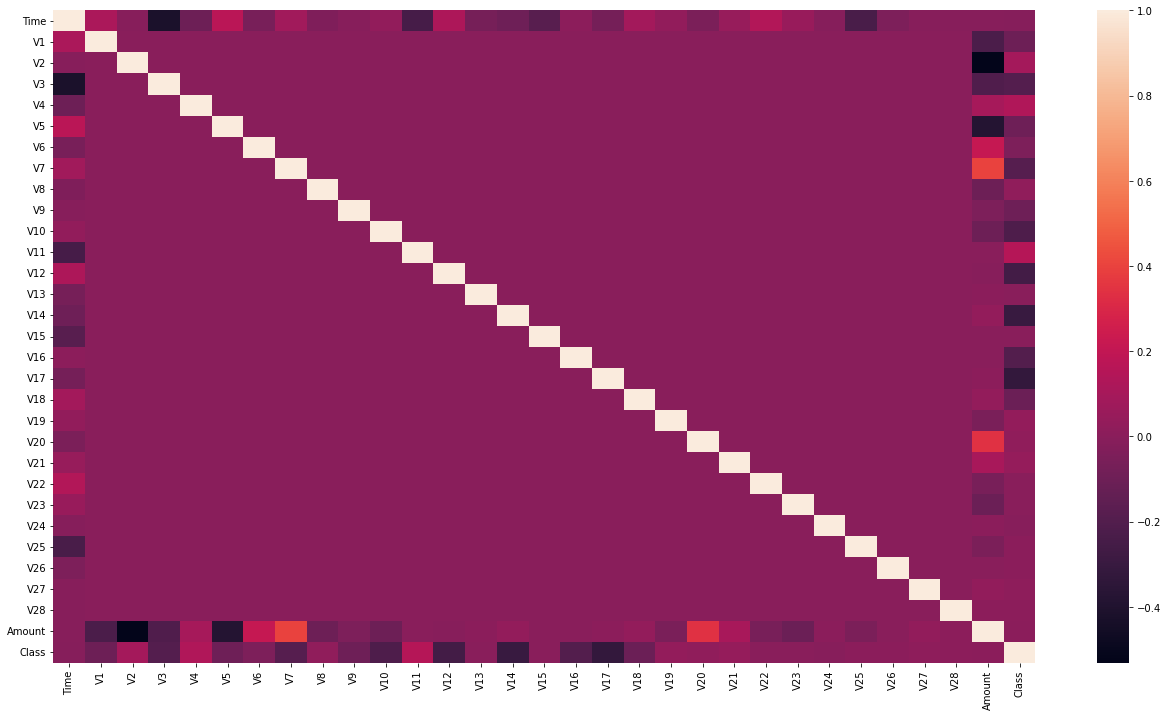

In [11]:
plt.figure(figsize=(22,12))
sns.heatmap(card.corr())

In [12]:
card.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Separating the data for analysis

In [13]:
legit = card[card['Class'] == 0]
fraud = card[card['Class'] == 1]

In [14]:
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [19]:
fraud.loc[541].values

array([ 4.06000000e+02, -2.31222654e+00,  1.95199201e+00, -1.60985073e+00,
        3.99790559e+00, -5.22187865e-01, -1.42654532e+00, -2.53738731e+00,
        1.39165725e+00, -2.77008928e+00, -2.77227214e+00,  3.20203321e+00,
       -2.89990739e+00, -5.95221881e-01, -4.28925378e+00,  3.89724120e-01,
       -1.14074718e+00, -2.83005567e+00, -1.68224682e-02,  4.16955705e-01,
        1.26910559e-01,  5.17232371e-01, -3.50493686e-02, -4.65211076e-01,
        3.20198199e-01,  4.45191675e-02,  1.77839798e-01,  2.61145003e-01,
       -1.43275875e-01,  0.00000000e+00,  1.00000000e+00])

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
#statistical measures of the data
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
#comparing the values for both transactions
card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
#Building a Sample dataset containing similar distribution of normal transaction and fraudulent transactions
#No. of fraudulent transaction = 492

legit_sample = legit.sample(n=492)

In [18]:
df = pd.concat([legit_sample,fraud],axis=0)

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53787,46147.0,0.333194,-1.205762,-0.366989,1.691462,-0.536827,-0.258842,0.741044,-0.138599,0.195877,...,0.247984,-0.167860,-0.495047,0.089781,0.558363,-0.274743,-0.067285,0.085393,450.00,0
64825,51322.0,-0.689787,1.014067,2.198954,1.046605,-0.137711,-0.617482,0.902764,-0.528637,0.427018,...,-0.225127,-0.150865,-0.117254,0.905417,-0.298906,-0.599418,-0.323051,-0.225229,7.60,0
88178,62018.0,1.154295,0.218090,0.559036,1.061091,-0.482126,-0.701078,-0.011161,-0.026835,-0.138011,...,0.011558,-0.026952,-0.010124,0.502601,0.462238,-0.467846,0.013383,0.018171,14.99,0
199295,132894.0,0.269756,0.326315,2.030849,2.227530,-0.740320,1.789202,-1.218308,-0.295207,0.844207,...,0.604731,-0.392681,-0.336119,0.254051,1.273779,0.007470,0.228273,0.181041,6.00,0
200876,133620.0,-2.496729,-1.773533,-0.292754,-0.103293,1.765374,1.174816,-0.789471,0.636022,0.718976,...,-0.118042,0.148130,-0.806583,-0.730478,-2.014686,-0.762798,0.230557,-0.551993,99.43,0


In [20]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
#the nature of dataset is not much changed
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95383.924797,0.082430,0.045912,0.106504,0.071316,-0.050981,-0.108487,-0.014420,-0.055718,-0.012573,...,-0.059472,0.044936,0.029106,-0.016668,0.043057,0.034862,0.026130,0.004473,0.011638,70.040610
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features and Targets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Class',axis=1)
y = df['Class']

In [24]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
53787,46147.0,0.333194,-1.205762,-0.366989,1.691462,-0.536827,-0.258842,0.741044,-0.138599,0.195877,...,0.626592,0.247984,-0.167860,-0.495047,0.089781,0.558363,-0.274743,-0.067285,0.085393,450.00
64825,51322.0,-0.689787,1.014067,2.198954,1.046605,-0.137711,-0.617482,0.902764,-0.528637,0.427018,...,0.167364,-0.225127,-0.150865,-0.117254,0.905417,-0.298906,-0.599418,-0.323051,-0.225229,7.60
88178,62018.0,1.154295,0.218090,0.559036,1.061091,-0.482126,-0.701078,-0.011161,-0.026835,-0.138011,...,-0.148100,0.011558,-0.026952,-0.010124,0.502601,0.462238,-0.467846,0.013383,0.018171,14.99
199295,132894.0,0.269756,0.326315,2.030849,2.227530,-0.740320,1.789202,-1.218308,-0.295207,0.844207,...,0.033594,0.604731,-0.392681,-0.336119,0.254051,1.273779,0.007470,0.228273,0.181041,6.00
200876,133620.0,-2.496729,-1.773533,-0.292754,-0.103293,1.765374,1.174816,-0.789471,0.636022,0.718976,...,-0.890174,-0.118042,0.148130,-0.806583,-0.730478,-2.014686,-0.762798,0.230557,-0.551993,99.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [25]:
y

53787     0
64825     0
88178     0
199295    0
200876    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [27]:
X_train.shape

(688, 30)

In [28]:
y_train.shape

(688,)

Model Creating and Evaluation

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
from sklearn.svm import SVC

In [31]:
modell = SVC()

In [32]:
modell.fit(X_train,y_train)

SVC()

In [33]:
model_predictionn = modell.predict(X_test)

In [34]:
y_prediction = pd.DataFrame(data=model_predictionn,columns=['model_prediction'])

In [35]:
y_prediction

,model_prediction
0,1
1,1
2,0
3,1
4,1
...,...
291,1
292,0
293,1
294,1


In [36]:
y_test

115071    0
150662    1
163565    0
129738    0
21526     0
         ..
114301    0
154676    1
10897     1
89927     0
184379    1
Name: Class, Length: 296, dtype: int64

In [37]:
y_actual = pd.DataFrame(data=y_test.values,columns=['actual_prediction'])

In [38]:
y_actual

,actual_prediction
0,0
1,1
2,0
3,0
4,0
...,...
291,0
292,1
293,1
294,0


In [39]:
final = pd.concat([y_prediction,y_actual],axis=1)

In [40]:
final

,model_prediction,actual_prediction
0,1,0
1,1,1
2,0,0
3,1,0
4,1,0
...,...,...
291,1,0
292,0,1
293,1,1
294,1,0


In [41]:
print(accuracy_score(final['actual_prediction'],final['model_prediction']))

0.5405405405405406


<AxesSubplot:>

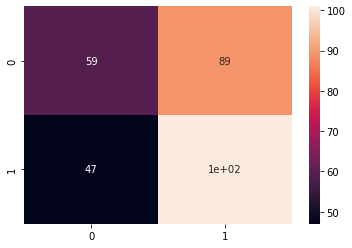

In [42]:
sns.heatmap(confusion_matrix(final['actual_prediction'],final['model_prediction']),annot = True)

In [43]:
print(classification_report(final['actual_prediction'],final['model_prediction']))

              precision    recall  f1-score   support

           0       0.56      0.40      0.46       148
           1       0.53      0.68      0.60       148

    accuracy                           0.54       296
   macro avg       0.54      0.54      0.53       296
weighted avg       0.54      0.54      0.53       296



In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [46]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [65]:
import joblib

In [66]:
joblib.dump(model,'lr_model.pkl')

['lr_model.pkl']

In [47]:
y_predict = model.predict(X_test)

In [48]:
y_prediction = pd.DataFrame(data=y_predict,columns=['model_prediction'])

In [49]:
y_prediction

,model_prediction
0,0
1,1
2,0
3,0
4,0
...,...
291,0
292,1
293,1
294,0


In [50]:
final = pd.concat([y_prediction,y_actual],axis=1)

In [51]:
final

,model_prediction,actual_prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,1
293,1,1
294,0,0


In [52]:
print(accuracy_score(final['actual_prediction'],final['model_prediction']))

0.918918918918919


In [53]:
print(confusion_matrix(final['actual_prediction'],final['model_prediction']))

[[140   8]
 [ 16 132]]


<AxesSubplot:>

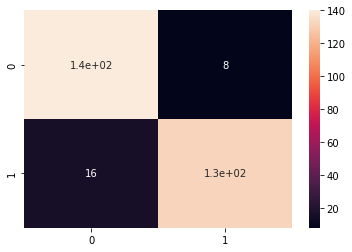

In [54]:
sns.heatmap(confusion_matrix(final['actual_prediction'],final['model_prediction']),annot = True)

In [55]:
print(classification_report(final['actual_prediction'],final['model_prediction']))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       148
           1       0.94      0.89      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296

